<a href="https://colab.research.google.com/github/sartaj-sb/Tensorflow-Developer-Professitional-Certificate/blob/main/Humans_and_Horses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

code to download compressed dataset horse-or-human

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-02-20 16:57:04--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  22.2MB/s    in 6.7s    

2024-02-20 16:57:11 (21.3 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import zipfile
# unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [3]:
import os

train_horse_dir = os.path.join('./horse-or-human/horses')

train_human_dir = os.path.join('./horse-or-human/humans')

Seeing the file names

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse44-7.png', 'horse13-1.png', 'horse20-2.png', 'horse50-9.png', 'horse46-5.png', 'horse20-9.png', 'horse11-0.png', 'horse38-3.png', 'horse31-4.png', 'horse32-3.png']
['human14-06.png', 'human17-23.png', 'human04-11.png', 'human04-22.png', 'human08-08.png', 'human11-11.png', 'human06-28.png', 'human03-27.png', 'human06-23.png', 'human05-11.png']


Number of horses and humans in the directory

In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


Displaying a batch of 8 horses and 8 human pictures

In [6]:
# Configuring the matplotlib parameters
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

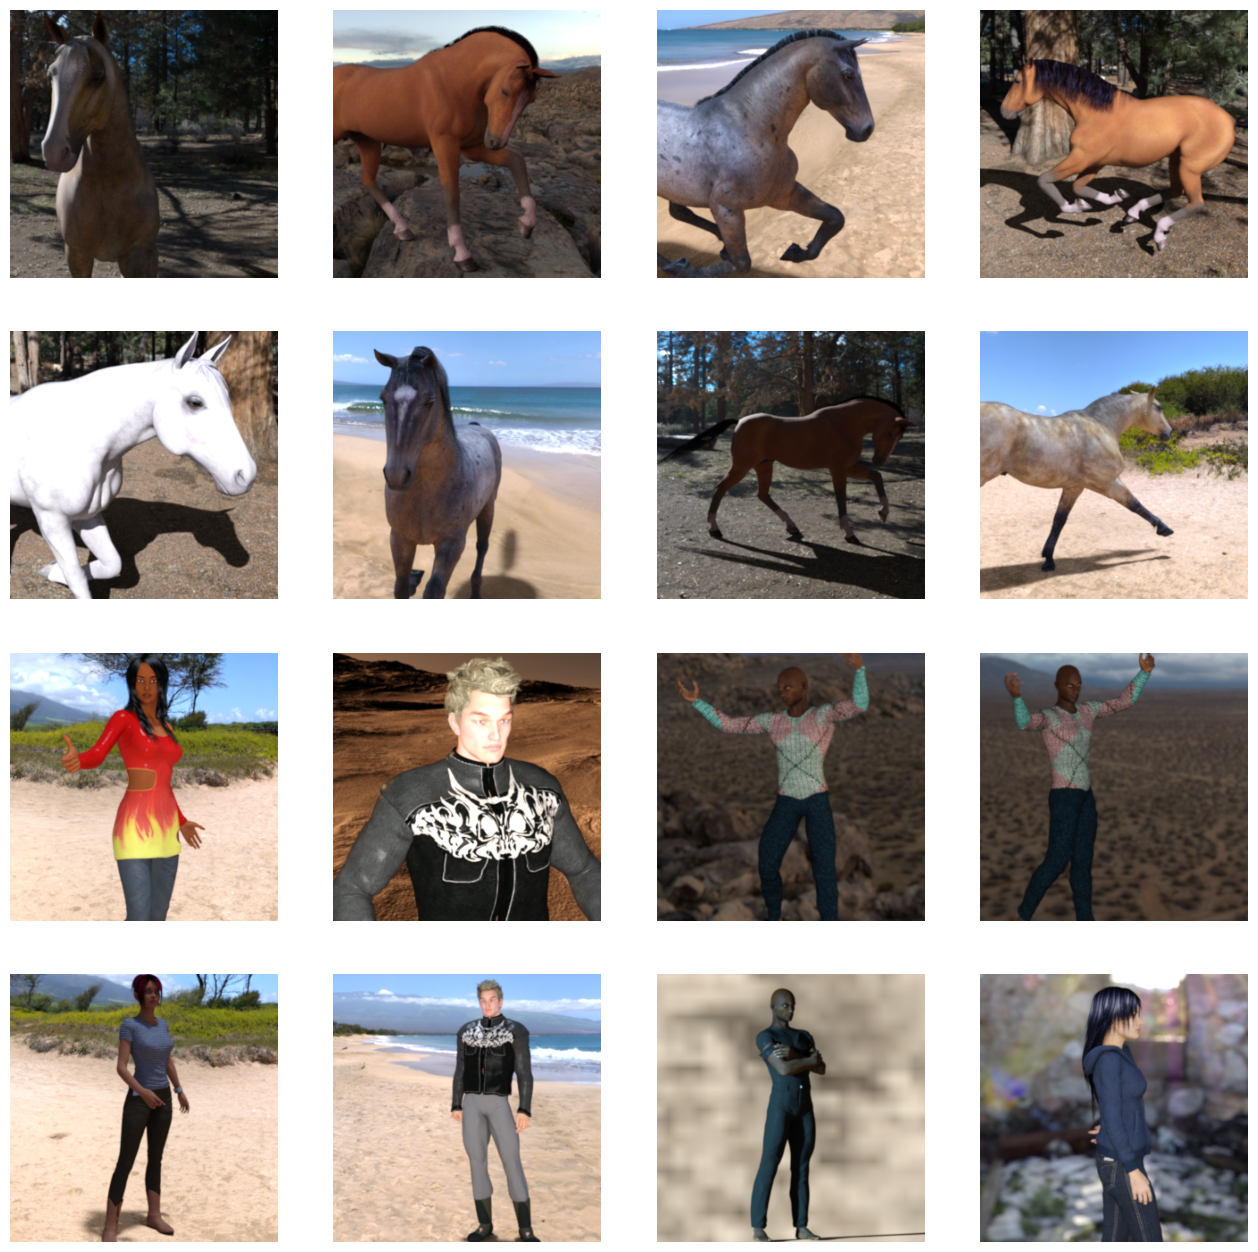

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
import tensorflow as tf

In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

###Data preprocessing
##### data generators will read pictures in the source folders and convert them to float32 tensors.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#data that goes into neural networks should usually be normalized in
# some way to make it more amenable to processing by the network
# In this case, you will preprocess the images by normalizing the pixel
# values to be in the [0, 1] range (originally all values are in the
#[0, 255] range).
train_datagen = ImageDataGenerator(rescale=1/255)

# flow traing images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    #since we are using binary_cross_entropy loss, we need binary labels
    class_mode='binary'
)



Found 1027 images belonging to 2 classes.


In [13]:
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1)

Epoch 1/15
8/8 [==============================] - 17s 640ms/step - loss: 0.7522 - accuracy: 0.5295
Epoch 2/15
8/8 [==============================] - 8s 900ms/step - loss: 0.6807 - accuracy: 0.6263
Epoch 3/15
8/8 [==============================] - 6s 756ms/step - loss: 0.6901 - accuracy: 0.5840
Epoch 4/15
8/8 [==============================] - 7s 786ms/step - loss: 0.9107 - accuracy: 0.7397
Epoch 5/15
8/8 [==============================] - 7s 907ms/step - loss: 0.6815 - accuracy: 0.8053
Epoch 6/15
8/8 [==============================] - 7s 830ms/step - loss: 0.3228 - accuracy: 0.8843
Epoch 7/15
8/8 [==============================] - 7s 805ms/step - loss: 0.3261 - accuracy: 0.8576
Epoch 8/15
8/8 [==============================] - 6s 764ms/step - loss: 0.3270 - accuracy: 0.8743
Epoch 9/15
8/8 [==============================] - 7s 785ms/step - loss: 0.3827 - accuracy: 0.8587
Epoch 10/15
8/8 [==============================] - 7s 838ms/step - loss: 0.9823 - accuracy: 0.8799
Epoch 11/15
8/8 [=

Model prediction

In [15]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving portrait-5115894_640.jpg to portrait-5115894_640.jpg
1/1 [==============================] - 0s 18ms/step
[0.99997807]
portrait-5115894_640.jpg is a human


Visualizing intermediate representations

1/1 [==============================] - 0s 94ms/step


<ipython-input-16-3501e75cf878>:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-16-3501e75cf878>:48: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


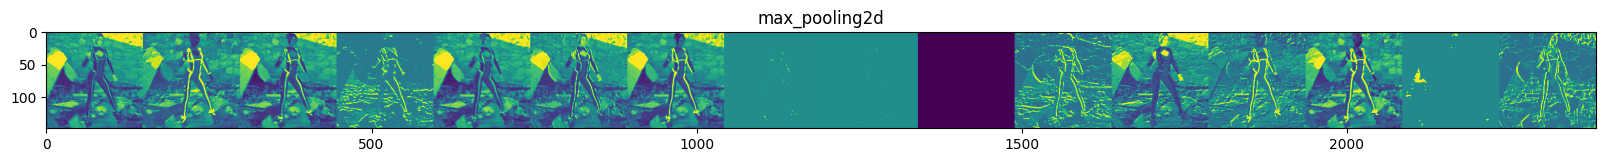

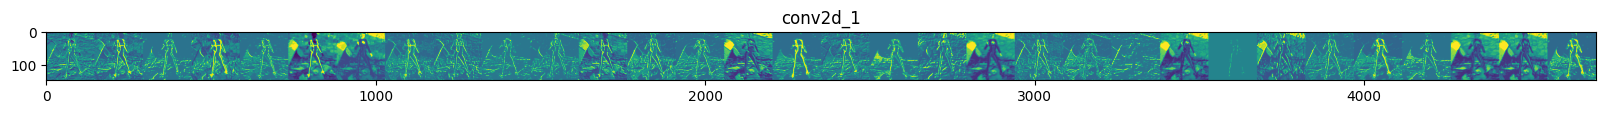

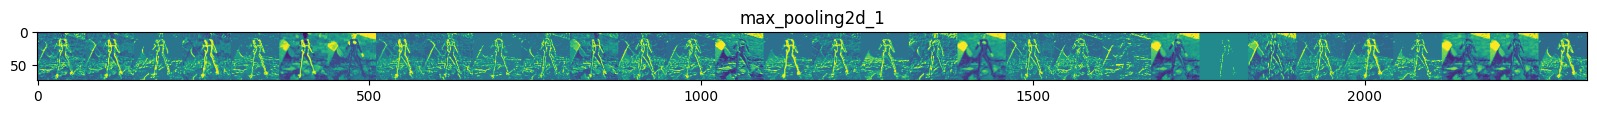

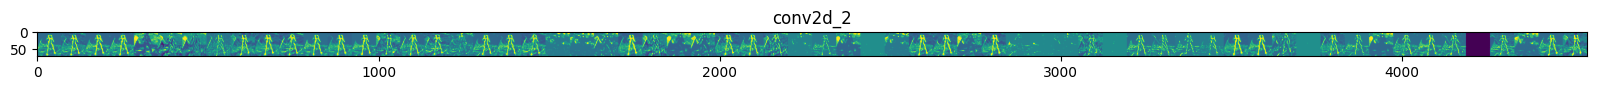

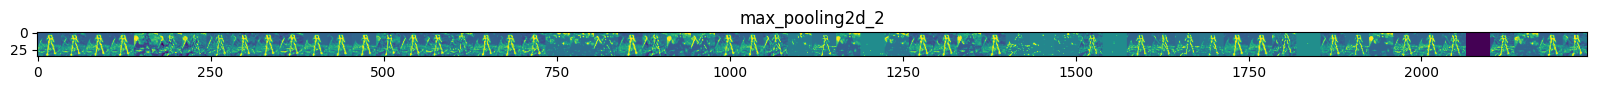

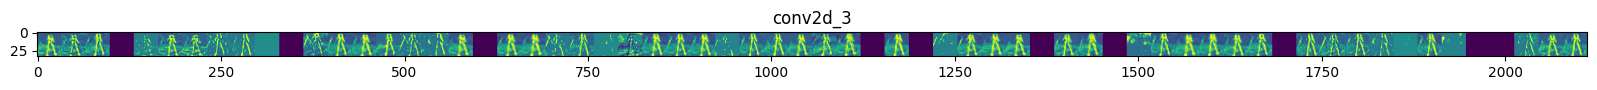

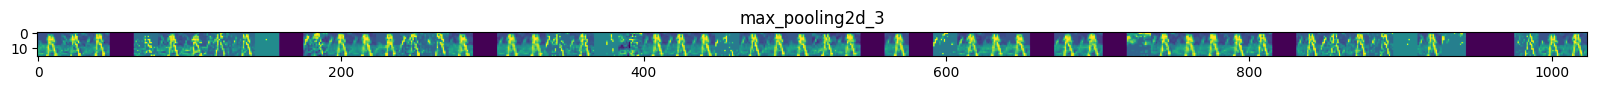

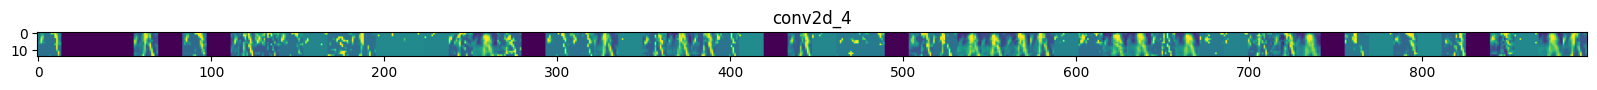

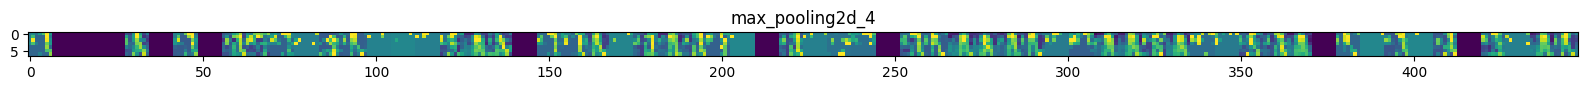

In [16]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')